In [1]:
import numpy as np
import nonlin as nol                      # import non-linearity functn.
import convolut as con                    # import batch_norm ,convol,pool both fwd and bcwd

from sklearn.datasets import fetch_mldata #import data
mnist = fetch_mldata('MNIST original')

A_prev = mnist.data                       #Input
Y = mnist.target                          #labels
A_prev = A_prev[69000:70000,:]
Y = np.array(Y)
Y = Y[69000:70000]
Y = Y.reshape(1000,1)
Y = Y.astype(int)
Y = nol.convert_to_one_hot(Y,10)          #convert to one hot

In [2]:
def reshape (A_prev):                     #reshape input to (m,n_H,n_W,n_C)
    X_layer = list()
    for m in (A_prev):
        X_layer.append(m.reshape(28,28))
    X_layer = np.array(X_layer)
    X_layer.shape  
    X_layer = X_layer.reshape(X_layer.shape[0],X_layer.shape[1],X_layer.shape[2],1)
    X_layer.shape
    return X_layer

In [3]:
A_prev = reshape(A_prev) /float(1000)                
(m,n_H,n_W,n_C_prev)=A_prev.shape
f = 3                                    # no. of filters
n_C_prev = 1                             #grey scale image

In [4]:
W = np.random.randn(f,f,n_C_prev,10)*0.01   #initialise filters

In [5]:
b = np.random.randn(1,1,1,10)*0.01       #initialise biase

In [6]:
hparameters_conv = {"pad" : 0,          #initialise hparameters for convolution
               "stride": 3}

In [7]:
hparameters_pool = {"f" : 3,            #initialise hparameters for pooling
                    "stride" : 1}

In [8]:
W_fc = np.random.randn(10,490)*0.01     #initialise weights for FC layer
b_fc = np.random.rand(1000,10)*0.01     #initialise bias for biase
gamma = np.random.randn(10)*0.01
beta  = np.random.randn(10)*0.01
eps = 0.0000001



In [9]:
lr = 0.001                              #learning rate 
iterations = 20                          #No. of iterations
cost = np.zeros(iterations)             #Initialise Cost 

In [10]:
for i in range(iterations):                                          #loop over iterations
    A, cache_conv = con.conv_forward(A_prev, W, b, hparameters_conv) #compute convolution  
    A1 ,cache_pool = con.pool_forward(A,hparameters_pool,mode = "max") #compute pooling
    A2 = nol.flatten_a_data(A1)                                      #convert to fc layer
    Z_fc = A2.dot(W_fc.T) +b_fc
    A3,cache_batchnorm_forward = nol.batchnorm_forward(Z_fc,gamma,beta,eps) #batch norm fwd
    A4 = nol.softmax(A3)                                            #softmax 
    cost[i] = nol.loss(A4,Y)                                        #compute cost
    print(cost[i])
    dA3 = A4-Y                                                      #backprop steps
    dZ_fc, dgamma, dbeta = nol.batchnorm_backward(dA3 ,cache_batchnorm_forward)  #batchnorm bcwd                      #
    dW_fc = dZ_fc.T.dot(A2)
    db_fc = dZ_fc                                                   
    dA2 = np.dot(dZ_fc,W_fc)
    
    dA = con.pool_backward(A1 , cache_pool,mode = "max" )           #backpool
    dA_prev , dW , db = con.conv_backward(dA,cache_conv)            #back convolution
    
    gamma = gamma - dgamma*lr                                       #updating parameters
    beta = beta - dbeta*lr
    W_fc = W_fc - dW_fc*lr
    b_fc = b_fc - db_fc*lr
    A2 = A2 - dA2*lr

    A1 = np.reshape(A2,(1000,7,7,10))
    
    A = A - dA*lr
    W = W - dW*lr
    b = b - db*lr

9.20835468325
8.36722668736
7.7032804434
7.27755040165
7.06028521487
6.96671869889
6.92993878748
6.9160477411
6.91088237666
6.90897435544
6.90827059009
6.90801134639
6.90791485019
6.90787993107
6.90786689493
6.90786212316
6.9078594987
6.90785897941
6.90785864893
6.90785854526


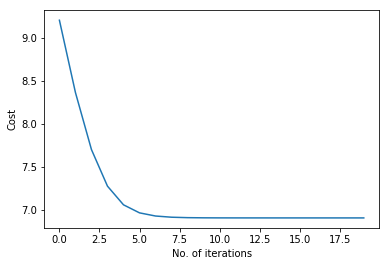

In [11]:
import matplotlib.pyplot as plt                         # plot Cost vs no. of iterarions
plt.plot(np.arange(len(cost)),cost)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.show()

In [21]:
#calculation of accuracy
p = np.zeros((A4.shape))
count = 0
for i in range (1000):
    j = np.unravel_index(A4[i].argmax(), A4[i].shape)
    if Y[i][j] == 1. :
        count = count + 1
accuracy = count / float(1000)
print (accuracy*100)

100.0
